In [2]:
import pandas as pd


# 가격 상관분석

In [3]:
mackerel_output_and_price = pd.read_csv("./data/mackerel/고등어 생산량 및 가격.csv", encoding='cp949')
mackerel_output_and_price[mackerel_output_and_price.iloc[:,9:].isnull().any(axis=1)]

# 보간법으로 결측치 처리
mackerel_output_and_price['소비자가격(냉동)(원/kg)'] = mackerel_output_and_price['소비자가격(냉동)(원/kg)'].interpolate()
mackerel_output_and_price = mackerel_output_and_price.drop(columns=mackerel_output_and_price.columns[4:9])
mackerel_output_and_price

,년도,월,생산량(톤),재고량(톤),소비자가격(냉동)(원/kg)
0,2013년,12월,22510,74415,6137.0
1,2014년,01월,6480,76582,6211.0
2,2014년,02월,3783,71248,6286.0
3,2014년,03월,3057,63630,6251.0
4,2014년,04월,1649,56994,6346.0
...,...,...,...,...,...
118,2023년,10월,12589,39553,12157.0
119,2023년,11월,15435,36745,12503.0
120,2023년,12월,8517,40676,12283.0
121,2024년,01월,8486,40026,12680.0


In [4]:
mackerel_import_price = pd.read_csv("./data/mackerel/고등어 월별 평균수입가격.csv", encoding='cp949')
mackerel_import_price = mackerel_import_price.drop(columns=['고등어(신선,냉장) (원/kg)'])
mackerel_import_price

,년도,월,고등어(냉동) (원/kg),수입량(톤)
0,2013년,12월,2883,5386
1,2014년,01월,2955,3476
2,2014년,02월,2974,1101
3,2014년,03월,2562,2011
4,2014년,04월,2688,2454
...,...,...,...,...
118,2023년,10월,3302,193
119,2023년,11월,3002,2127
120,2023년,12월,2918,10476
121,2024년,01월,2997,2496


In [24]:
merge_price = pd.merge(mackerel_output_and_price, mackerel_import_price, on=['년도', '월'])
merge_price

,년도,월,생산량(톤),재고량(톤),소비자가격(냉동)(원/kg),고등어(냉동) (원/kg),수입량(톤)
0,2013년,12월,22510,74415,6137.0,2883,5386
1,2014년,01월,6480,76582,6211.0,2955,3476
2,2014년,02월,3783,71248,6286.0,2974,1101
3,2014년,03월,3057,63630,6251.0,2562,2011
4,2014년,04월,1649,56994,6346.0,2688,2454
...,...,...,...,...,...,...,...
118,2023년,10월,12589,39553,12157.0,3302,193
119,2023년,11월,15435,36745,12503.0,3002,2127
120,2023년,12월,8517,40676,12283.0,2918,10476
121,2024년,01월,8486,40026,12680.0,2997,2496


In [26]:
merge_price = merge_price.rename(columns={'고등어(냉동) (원/kg)': '수입가격(냉동) (원/kg)'})
merge_price.iloc[:,2:].corr()

,생산량(톤),재고량(톤),소비자가격(냉동)(원/kg),수입가격(냉동) (원/kg),수입량(톤)
생산량(톤),1.000000,0.075190,-0.005653,0.025424,0.083984
재고량(톤),0.075190,1.000000,-0.271082,-0.240417,0.402011
소비자가격(냉동)(원/kg),-0.005653,-0.271082,1.000000,0.662473,0.083730
수입가격(냉동) (원/kg),0.025424,-0.240417,0.662473,1.000000,-0.089832
수입량(톤),0.083984,0.402011,0.083730,-0.089832,1.000000


# 수온 상관분석

In [30]:
# 거문도
geomun=pd.read_csv('./data/temperature/month/거문도_월별.csv',index_col='일시',encoding='cp949')
geomun=geomun.iloc[:,:5]
geomun.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.711025,-0.558340,-0.606831,-0.422434
평균기압(hPa),0.711025,1.000000,-0.695306,-0.783227,-0.613100
평균 상대습도(%),-0.558340,-0.695306,1.000000,0.677654,0.466099
평균 기온(°C),-0.606831,-0.783227,0.677654,1.000000,0.909417
평균 수온(°C),-0.422434,-0.613100,0.466099,0.909417,1.000000


In [31]:
# 거제도
geoje=pd.read_csv('./data/temperature/month/거제도_월별.csv',index_col='일시',encoding='cp949')
geoje=geoje.iloc[:,:5]
geoje.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m)
평균 풍속(m/s),1.000000,0.460749,-0.448086,-0.341107,-0.188440,0.730477,0.355379
평균기압(hPa),0.460749,1.000000,-0.903674,-0.831105,-0.586339,0.113213,0.104105
평균 상대습도(%),-0.448086,-0.903674,1.000000,0.801270,0.536902,-0.092172,-0.107468
평균 기온(°C),-0.341107,-0.831105,0.801270,1.000000,0.869319,0.006280,0.031510
평균 수온(°C),-0.188440,-0.586339,0.536902,0.869319,1.000000,0.080005,0.117687
평균 최대 파고(m),0.730477,0.113213,-0.092172,0.006280,0.080005,1.000000,0.638549
평균 유의 파고(m),0.355379,0.104105,-0.107468,0.031510,0.117687,0.638549,1.000000


In [32]:
# 신안
shinan=pd.read_csv('./data/temperature/month/신안_월별.csv',index_col='일시',encoding='cp949')
shinan=shinan.iloc[:,:5]
shinan.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m)
평균 풍속(m/s),1.000000,0.859587,-0.794749,-0.767319,-0.658459,0.856453,0.860826
평균기압(hPa),0.859587,1.000000,-0.888791,-0.892999,-0.792991,0.785051,0.847756
평균 상대습도(%),-0.794749,-0.888791,1.000000,0.774605,0.663610,-0.783351,-0.743378
평균 기온(°C),-0.767319,-0.892999,0.774605,1.000000,0.972685,-0.716993,-0.749145
평균 수온(°C),-0.658459,-0.792991,0.663610,0.972685,1.000000,-0.590045,-0.633237
평균 최대 파고(m),0.856453,0.785051,-0.783351,-0.716993,-0.590045,1.000000,0.780304
평균 유의 파고(m),0.860826,0.847756,-0.743378,-0.749145,-0.633237,0.780304,1.000000


In [33]:
# 울산
ulsan=pd.read_csv('./data/temperature/month/울산_월별.csv',index_col='일시',encoding='cp949')
ulsan=ulsan.iloc[:,:5]
ulsan.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.473623,-0.397007,-0.467204,-0.382213
평균기압(hPa),0.473623,1.000000,-0.911193,-0.838055,-0.645527
평균 상대습도(%),-0.397007,-0.911193,1.000000,0.813864,0.619075
평균 기온(°C),-0.467204,-0.838055,0.813864,1.000000,0.899463
평균 수온(°C),-0.382213,-0.645527,0.619075,0.899463,1.000000


In [34]:
# 추자도
chuja=pd.read_csv('./data/temperature/month/추자도_월별.csv',index_col='일시',encoding='utf-8')
chuja.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.591550,-0.635019,-0.502691,-0.288344
평균기압(hPa),0.591550,1.000000,-0.854888,-0.786660,-0.627412
평균 상대습도(%),-0.635019,-0.854888,1.000000,0.700068,0.466352
평균 기온(°C),-0.502691,-0.786660,0.700068,1.000000,0.922102
평균 수온(°C),-0.288344,-0.627412,0.466352,0.922102,1.000000


In [14]:
# 칠발도
chilbal=pd.read_csv('./data/temperature/month/칠발도_월별.csv',index_col='일시')
chilbal.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.873253,-0.802051,-0.706943,-0.566188
평균기압(hPa),0.873253,1.000000,-0.828288,-0.848397,-0.737006
평균 상대습도(%),-0.802051,-0.828288,1.000000,0.620413,0.476227
평균 기온(°C),-0.706943,-0.848397,0.620413,1.000000,0.973525
평균 수온(°C),-0.566188,-0.737006,0.476227,0.973525,1.000000


In [15]:
# 통영
tongyeoung=pd.read_csv('./data/temperature/month/통영_월별.csv',index_col='일시')
tongyeoung.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.494021,-0.505427,-0.398178,-0.282237
평균기압(hPa),0.494021,1.000000,-0.876706,-0.868994,-0.738777
평균 상대습도(%),-0.505427,-0.876706,1.000000,0.787065,0.632881
평균 기온(°C),-0.398178,-0.868994,0.787065,1.000000,0.952631
평균 수온(°C),-0.282237,-0.738777,0.632881,0.952631,1.000000


In [16]:
# 포항
pohang=pd.read_csv('./data/temperature/month/포항_월별.csv',index_col='일시')
pohang.corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.763726,-0.748350,-0.798079,-0.615189
평균기압(hPa),0.763726,1.000000,-0.888185,-0.820965,-0.626271
평균 상대습도(%),-0.748350,-0.888185,1.000000,0.830302,0.603027
평균 기온(°C),-0.798079,-0.820965,0.830302,1.000000,0.891405
평균 수온(°C),-0.615189,-0.626271,0.603027,0.891405,1.000000


In [49]:
# 전체
total=pd.read_csv('./data/temperature/전체통합_월별(13~).csv',encoding='cp949')
total=total.iloc[:,:7]
total.iloc[:,2:].corr()

,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C)
평균 풍속(m/s),1.000000,0.810594,-0.802631,-0.681499,-0.500293
평균기압(hPa),0.810594,1.000000,-0.939144,-0.860695,-0.707879
평균 상대습도(%),-0.802631,-0.939144,1.000000,0.803275,0.628884
평균 기온(°C),-0.681499,-0.860695,0.803275,1.000000,0.946962
평균 수온(°C),-0.500293,-0.707879,0.628884,0.946962,1.000000


# 가격 + 수온 상관분석

In [37]:
merge_price_temp = pd.merge(total,merge_price, on=['년도', '월'])
merge_price_temp.iloc[:,6:].corr()

,평균 수온(°C),생산량(톤),재고량(톤),소비자가격(냉동)(원/kg),수입가격(냉동) (원/kg),수입량(톤)
평균 수온(°C),1.000000,0.113700,-0.520270,0.081851,0.087981,-0.641836
생산량(톤),0.113700,1.000000,0.075190,-0.005653,0.025424,0.083984
재고량(톤),-0.520270,0.075190,1.000000,-0.271082,-0.240417,0.402011
소비자가격(냉동)(원/kg),0.081851,-0.005653,-0.271082,1.000000,0.662473,0.083730
수입가격(냉동) (원/kg),0.087981,0.025424,-0.240417,0.662473,1.000000,-0.089832
수입량(톤),-0.641836,0.083984,0.402011,0.083730,-0.089832,1.000000


# BoxPlot

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

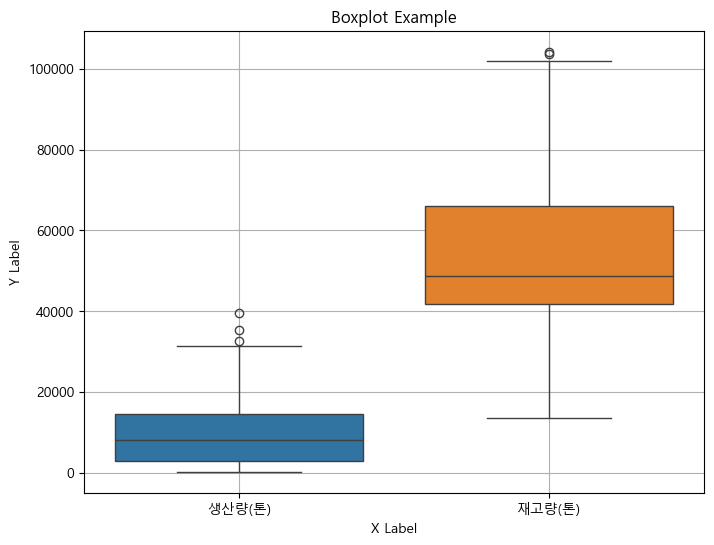

<Axes: >

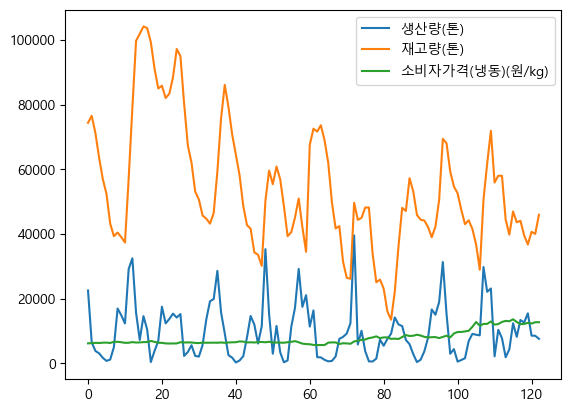

In [45]:
plt.figure(figsize=(8, 6))  # 그래프의 크기 설정 (선택사항)

# Matplotlib을 사용하여 boxplot 그리기
# plt.boxplot(mackerel_output_and_price.iloc[:,2:])

# Seaborn을 사용하여 boxplot 그리기
sns.boxplot(data=merge_price.iloc[:,2:4])

plt.title('Boxplot Example')  # 그래프 제목 설정 (선택사항)
plt.xlabel('X Label')  # x축 레이블 설정 (선택사항)
plt.ylabel('Y Label')  # y축 레이블 설정 (선택사항)
plt.grid(True)  # 그리드 표시 여부 설정 (선택사항)
plt.show()
mackerel_output_and_price.plot()

<Axes: >

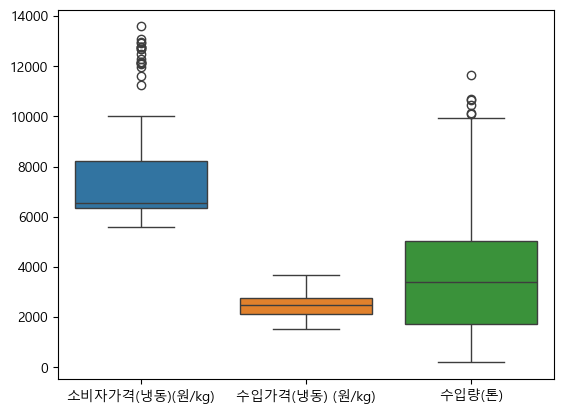

In [46]:
sns.boxplot(data=merge_price.iloc[:,4:])

In [47]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df=remove_outliers(df,'소비자가격(냉동)(원/kg)')
df=remove_outliers(df,'생산량(톤)')
df.iloc[:,2:].corr()

,생산량(톤),재고량(톤),소비자가격(냉동)(원/kg),수입가격(냉동) (원/kg),수입량(톤)
생산량(톤),1.000000,0.094117,-0.181072,-0.051743,0.046105
재고량(톤),0.094117,1.000000,-0.316060,-0.156839,0.413852
소비자가격(냉동)(원/kg),-0.181072,-0.316060,1.000000,0.525601,0.162878
수입가격(냉동) (원/kg),-0.051743,-0.156839,0.525601,1.000000,-0.033711
수입량(톤),0.046105,0.413852,0.162878,-0.033711,1.000000


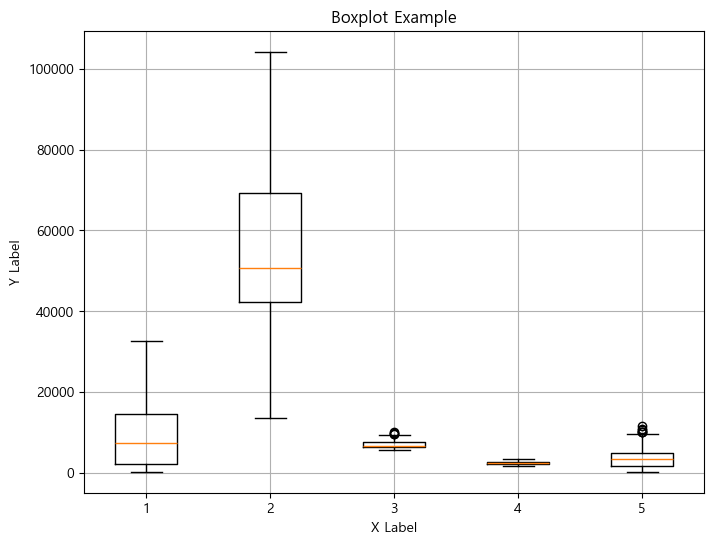

<Axes: >

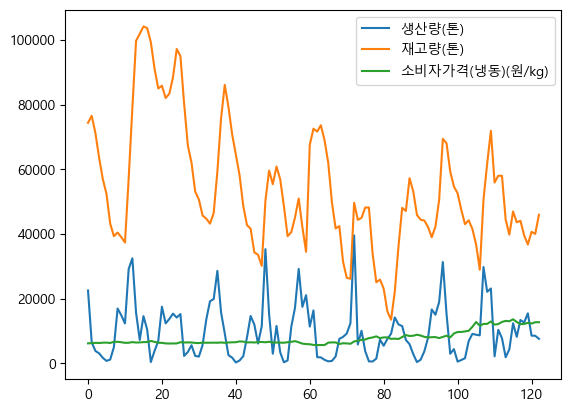

In [51]:
plt.figure(figsize=(8, 6))  # 그래프의 크기 설정 (선택사항)

# Matplotlib을 사용하여 boxplot 그리기
plt.boxplot(df.iloc[:,2:])

# Seaborn을 사용하여 boxplot 그리기
# sns.boxplot(data=df.iloc[:,2:])

plt.title('Boxplot Example')  # 그래프 제목 설정 (선택사항)
plt.xlabel('X Label')  # x축 레이블 설정 (선택사항)
plt.ylabel('Y Label')  # y축 레이블 설정 (선택사항)
plt.grid(True)  # 그리드 표시 여부 설정 (선택사항)
plt.show()
mackerel_output_and_price.plot()